# Credit EDA Case Study

# Introduction

This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

Importing the libraries.

In [9]:
#Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)

Read the dataset.

In [202]:
#import the 2 data set given:
appdata=pd.read_csv('application_data.csv')
#prevapp=pd.read_csv('previous_application.csv')

In [7]:
#reading the first data set :
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [13]:
#to know about the datatypes of each columns for the first dataset
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [15]:
#to know about the shape i.e (row,cols) for 1st dataset
appdata.shape

(307511, 122)

In [16]:
#summary of the 1st dataset
appdata.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [17]:
#reading the second dataset:
prevapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#to know the datatype of second dataset
prevapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [19]:
#summary of the second dataset:
prevapp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [21]:
#shape of the second dataset:
prevapp.shape

(1670214, 37)

In [27]:
#determining the percentage of null of col in first dataset:
round(100*appdata.isnull().sum()/appdata.shape[0],2).sort_values(ascending=False).head(50)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [203]:
#dropping the columns having more than or equal to 50% null values
appdata=appdata.loc[:,appdata.isnull().sum()/appdata.shape[0] <= 0.5]

In [48]:
cols1=round(100*appdata.isnull().sum()/appdata.shape[0],2)

In [69]:
cols1[~(cols1.values>50)].index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [64]:
cols

Index([], dtype='object')

In [58]:
appdata.loc[:,cols].head()

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
0,NaN,0.083037,0.0247,0.0369,0.6192,0.0143,0.00,0.0690,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.6341,0.0144,0.0000,0.0690,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.6243,0.0144,0.00,0.0690,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,"Stone, brick"
1,NaN,0.311267,0.0959,0.0529,0.7960,0.0605,0.08,0.0345,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.8040,0.0497,0.0806,0.0345,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.7987,0.0608,0.08,0.0345,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,Block
2,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
#checking now the null percent for each col i.e it should be less than 50%
(100*appdata.isnull().sum()/appdata.shape[0]).sort_values(ascending=False).head(50)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [74]:
#checking the shape after dropping columns having null greater than 50%
appdata.shape

(307511, 81)

In [90]:
#will start with imputation of cols haing null percent less than or equal to 13%
appdata.columns[(appdata.isnull().sum()/appdata.shape[0] > 0) & (appdata.isnull().sum()/appdata.shape[0] <=0.13)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [94]:
#look at the summary of col EXT_SOURCE_2
appdata['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

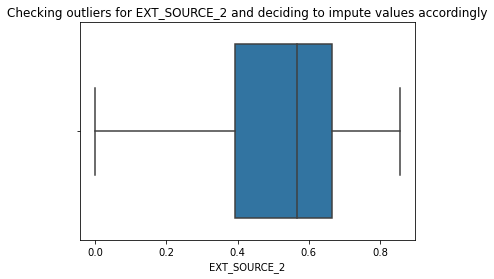

In [545]:
#to check any outliers are present for the cols EXT_SOURCE_2 by plotting boxplot
sns.boxplot(appdata['EXT_SOURCE_2'])
plt.title('Checking outliers for EXT_SOURCE_2 and deciding to impute values accordingly')
plt.show()

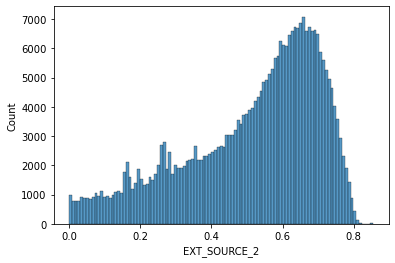

In [96]:
#plotting the histogram for the same col
sns.histplot(appdata['EXT_SOURCE_2'])
plt.show()

In [97]:
#finding the mean of the col EXT_SOURCE_2
appdata.EXT_SOURCE_2.mean()

0.5143926741308463

We can see that there are no outliers present for the col 'EXT_SOURCE_2' and also since this is a continous variable where mean is almost equal to median we can consider to impute the null/na with the mean value which is 0.5143926741308463


In [98]:
#imputation for 'AMT_ANNUITY'
appdata.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

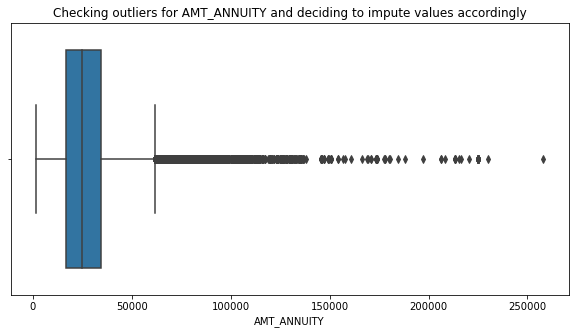

In [546]:
##to check any outliers are present for the cols AMT_ANNUITY by plotting boxplot
plt.figure(figsize=[10,5])
sns.boxplot(appdata.AMT_ANNUITY)
plt.title('Checking outliers for AMT_ANNUITY and deciding to impute values accordingly')
plt.show()

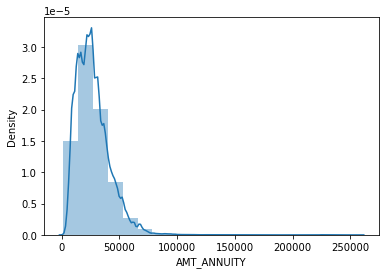

In [106]:
sns.distplot(appdata.AMT_ANNUITY,bins=20)
plt.show()

In [107]:
#finding the median of AMT_ANNUITY
appdata.AMT_ANNUITY.median()

24903.0

For the col 'AMT_ANNUITY' which is a continous variable too,we can see there are outliers and also the graph above is right skewed which means there are extreme higher values present due to whcih the means comes out to be huge,hence for this purpose we should use median whiich is 24903.0

In [124]:
#analysis for 'NAME_TYPE_SUITE' col
appdata.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:>

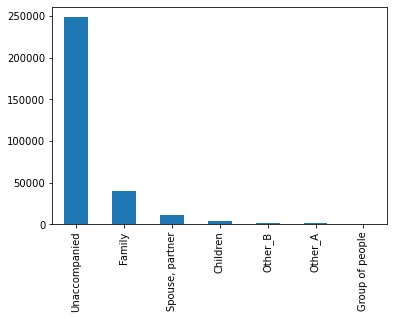

In [112]:
appdata.NAME_TYPE_SUITE.value_counts().plot.bar()

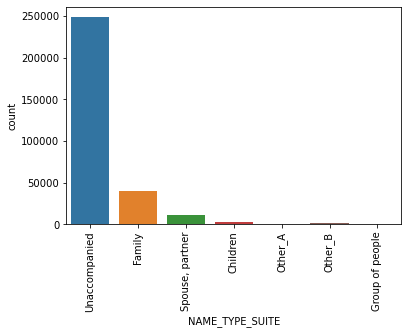

In [115]:
sns.countplot(appdata.NAME_TYPE_SUITE)
plt.xticks(rotation=90)
plt.show()

In [121]:
appdata.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

For the column 'NAME_TYPE_SUITE' which is categorical(nominal type)we can see that the value 'Unaccompanied' has the max count hence we take the mode of the col for the imputation process.

In [129]:
#analysis for CNT_FAM_MEMBERS col
appdata.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

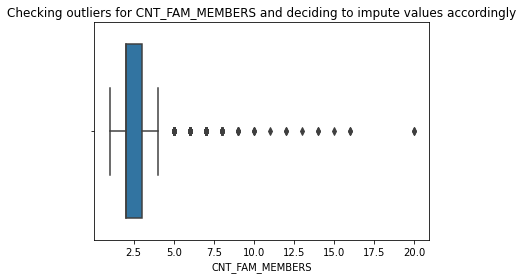

In [547]:
sns.boxplot(appdata.CNT_FAM_MEMBERS)
plt.title('Checking outliers for CNT_FAM_MEMBERS and deciding to impute values accordingly')
plt.show()

As there are outliers present for the col 'CNT_FAM_MEMBERS' we should be taking median which is 2.0

In [135]:
#imputation for the col AMT_GOODS_PRICE
appdata.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

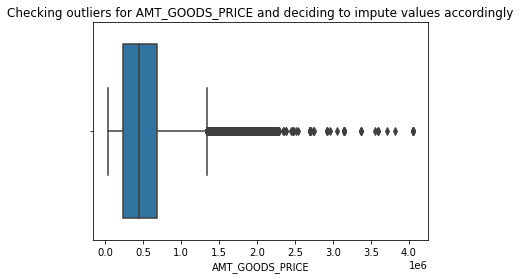

In [548]:
#to check if any outlier present or not
sns.boxplot(appdata['AMT_GOODS_PRICE'])
plt.title('Checking outliers for AMT_GOODS_PRICE and deciding to impute values accordingly')
plt.show()

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

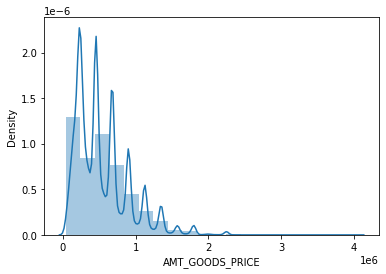

In [138]:
sns.distplot(appdata.AMT_GOODS_PRICE,bins=20)

In [140]:
appdata.AMT_GOODS_PRICE.median()

450000.0

For the col 'AMT_GOODS_PRICE' which is continous variable we can see there are outliers present i.e there are extreme values present so here we need to impute with median value which came out to be 450000.0.

In [141]:
#imputation for the col 'OCCUPATION_TYPE'
appdata.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

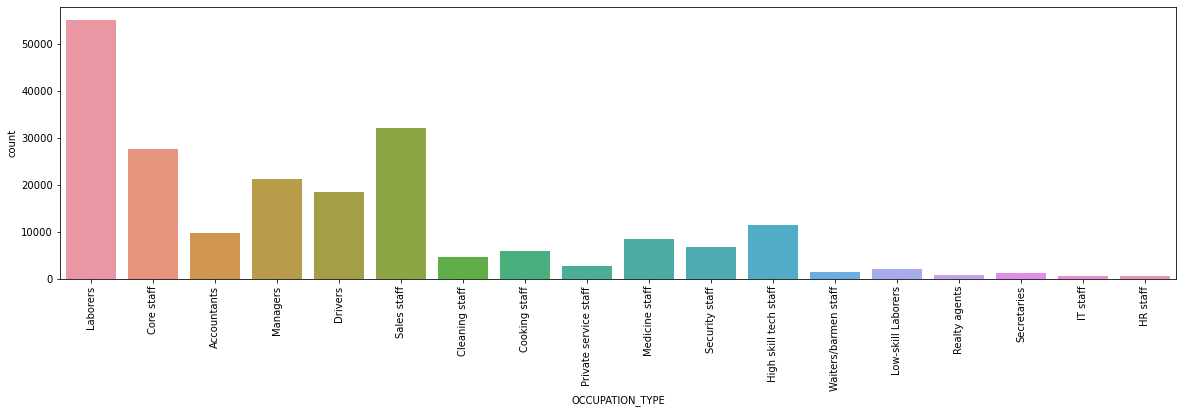

In [144]:
plt.figure(figsize=[20,5])
sns.countplot(appdata['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

In [146]:
appdata.OCCUPATION_TYPE.mode()[0]

'Laborers'

For the col 'OCCUPATION_TYPE' which is categorical value we can use the mode value i.e 'Laborers' to impute for null values.

Handling Incorrect Data Types

In [147]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [205]:
#converting the float datatype to integer types as these below col should be integer datatypes
flt_int_col=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

In [206]:
#converting the col integer datatypes
appdata[flt_int_col]=appdata[flt_int_col].apply(lambda x:x.astype('Int64',errors='ignore'))

In [207]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [208]:
#using list comprehension for getting all the col that starts with days
day_cols=[x for x in appdata if x.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [210]:
appdata[day_cols]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134
1,-16765,-1188,-1186.0,-291,-828
2,-19046,-225,-4260.0,-2531,-815
3,-19005,-3039,-9833.0,-2437,-617
4,-19932,-3038,-4311.0,-3458,-1106
...,...,...,...,...,...
307506,-9327,-236,-8456.0,-1982,-273
307507,-20775,365243,-4388.0,-4090,0
307508,-14966,-7921,-6737.0,-5150,-1909
307509,-11961,-4786,-2562.0,-931,-322


In [211]:
#since there are negative values present for the days col which is incorrect,we need to correct the negative values as days can't be negative
appdata[day_cols]=appdata[day_cols].apply(lambda x:abs(x))

In [212]:
#checking the day_cols after using absolute function
appdata[day_cols].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.0,2120,1134
1,16765,1188,1186.0,291,828
2,19046,225,4260.0,2531,815
3,19005,3039,9833.0,2437,617
4,19932,3038,4311.0,3458,1106


In [213]:
#checking the CODE_GENDER col.
appdata['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [214]:
appdata[appdata['CODE_GENDER']== 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,20232,10044,10024.0,3537,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,286,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,13717,2797,2241.0,4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.709205,0.310818,0.9811,0.0417,0.9811,0.0417,0.9811,0.0417,0.0090,No,0,0,0,0,493,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,4
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,10647,1228,183.0,1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.659185,0.076984,0.9921,0.1667,0.9921,0.1667,0.9921,0.1667,0.0769,No,7,1,7,1,851,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,9649,2293,4099.0,2326,1,1,1,1,1,0,NaN,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.658620,0.360613,0.9712,0.0833,0.9712,0.0833,0.9712,0.0833,0.0245,No,10,4,10,4,1681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6


In [215]:
#since gender code cannot be XNA as we cannot get much info from it and also we cannot replace the values with 'M' or 'F',hence we are dropping
#the rows with value having XNA as gender
appdata=appdata[-(appdata['CODE_GENDER']== 'XNA')]

In [263]:
appdata['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [219]:
#checking the quantile for AMT_INCOME_TOTAL
appdata['AMT_INCOME_TOTAL'].quantile([0,0.3,0.5,0.8,1.0])

0.0        25650.0
0.3       112500.0
0.5       147150.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [220]:
appdata['AMT_INCOME_TOTAL'].describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [224]:
#creating the bucket for AMT_INCOME_TOTAL 'ver low','low','medium','hight' and very high.
appdata['Income_bucket']=pd.qcut(appdata['AMT_INCOME_TOTAL'],(0,0.2,0.4,0.6,0.8,1.0),('vl','l','m','h','vh'))

In [226]:
appdata[['AMT_INCOME_TOTAL','Income_bucket']]

,AMT_INCOME_TOTAL,Income_bucket
0,202500.0,h
1,270000.0,vh
2,67500.0,vl
3,135000.0,l
4,121500.0,l
...,...,...
307506,157500.0,m
307507,72000.0,vl
307508,153000.0,m
307509,171000.0,h


In [227]:
appdata['DAYS_BIRTH'].quantile([0,0.2,0.4,0.6,0.8,1.0])

0.0     7489.0
0.2    11694.0
0.4    14416.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [230]:
#calculating and creating new age col from days of birth column
appdata['Age']=appdata['DAYS_BIRTH'].apply(lambda x: int(x/365))

In [231]:
appdata[['Age','DAYS_BIRTH']]

,Age,DAYS_BIRTH
0,25,9461
1,45,16765
2,52,19046
3,52,19005
4,54,19932
...,...,...
307506,25,9327
307507,56,20775
307508,41,14966
307509,32,11961


In [232]:
appdata['Age'].describe()

count    307507.000000
mean         43.436055
std          11.954577
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: Age, dtype: float64

In [236]:
#making the age bucket from the age column and since the maximum age is 70 and min is 20 we have created bucket from 20-70 with the step of 5.
appdata['Age_Bucket']=pd.cut(appdata['Age'],bins=np.arange(20,70,5))

In [237]:
appdata[['Age','Age_Bucket']]

,Age,Age_Bucket
0,25,"(20, 25]"
1,45,"(40, 45]"
2,52,"(50, 55]"
3,52,"(50, 55]"
4,54,"(50, 55]"
...,...,...
307506,25,"(20, 25]"
307507,56,"(55, 60]"
307508,41,"(40, 45]"
307509,32,"(30, 35]"


In [247]:
#calculating the percentage of default_clients and non_default_clients
appdata['TARGET'].value_counts(normalize=True)*100 

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

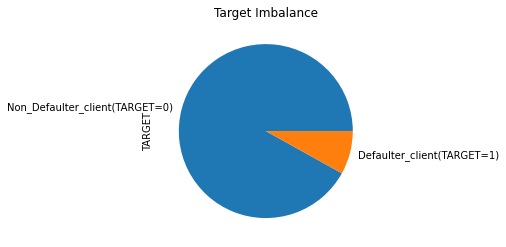

In [549]:
#since the value count is 0 and 1 only we can have pie chart for the tareget col
plt.title('Target Imbalance')
(appdata['TARGET'].value_counts(normalize=True)*100).plot.pie(labels=['Non_Defaulter_client(TARGET=0)','Defaulter_client(TARGET=1)'])
plt.show()

In [242]:
appdata['OBS_30_CNT_SOCIAL_CIRCLE']/appdata['DEF_30_CNT_SOCIAL_CIRCLE'].head()

0         1.0
1         inf
2         NaN
3         inf
4         NaN
         ... 
307506    NaN
307507    NaN
307508    NaN
307509    NaN
307510    NaN
Length: 307507, dtype: float64

In [259]:
#dataframe with non-defaulters data
app_target0 = appdata[appdata.TARGET==0]

In [260]:
#dataframe with defaulters data
app_target1 = appdata[appdata.TARGET==1]

# Univariate Analysis

In [353]:
#creating a function that can be called while plotting graph during univariate analysis
def countplot(col):
    fig,[axs1,axs2] = plt.subplots(1,2,figsize=[20,8])
    sns.countplot(app_target0[col],ax=axs1)
    axs1.set_xticklabels(axs1.get_xticklabels(),rotation=90)
    axs1.set_title(f'Non-defaulter distribution for {col}')
#calculating the count in percentage and then annotating the percentage at top of the bar    
    for p in axs1.patches:
        percentage='{:.1f}%'.format(100 * (p.get_height()/len(app_target0)))
        x=p.get_x()+0.1
        y=p.get_height()
        axs1.annotate(percentage,(x,y))
    sns.countplot(data=app_target1,x=col,ax=axs2)
    axs2.set_xticklabels(axs2.get_xticklabels(),rotation=90)
    axs2.set_title(f'defaulter distribution for {col}')
#calculating the count in percentage and then annotating the percentage at top of the bar 
    for p in axs2.patches:
        percentage='{:.1f}%'.format(100 * p.get_height()/len(app_target1))
        x=p.get_x()+0.1
        y=p.get_height()
        axs2.annotate(percentage,(x,y))

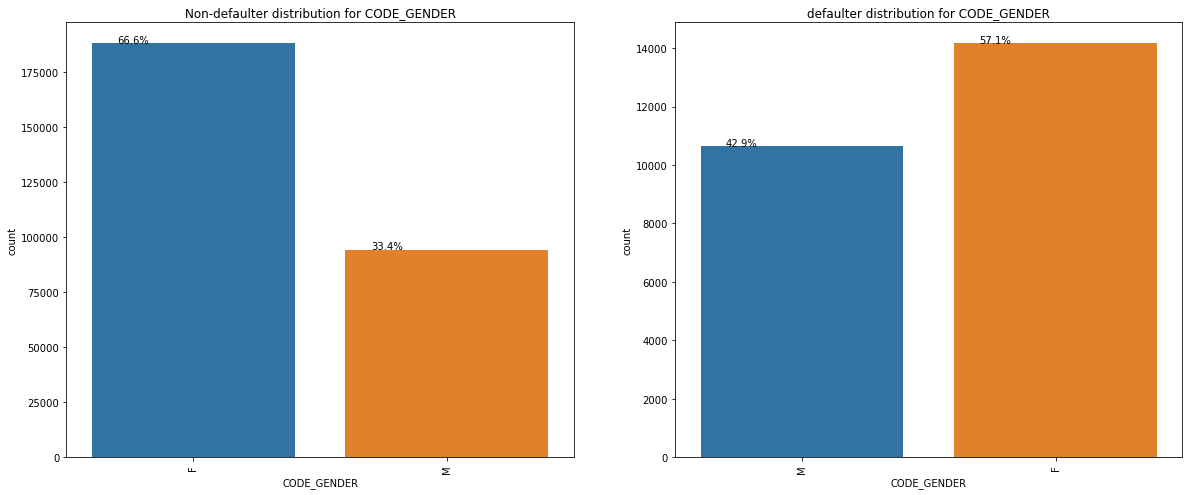

In [354]:
#plotting CODE_GENDER for target_0 and taregt_1 datasets.
countplot('CODE_GENDER')

From the above the count plot we can see that when it comes to non-defaulter or defaluter females have higher counts compared to males which infers that female are applying to loans more.Also we can see that the percent of defaulter male is higher compared to non-defaulter male.

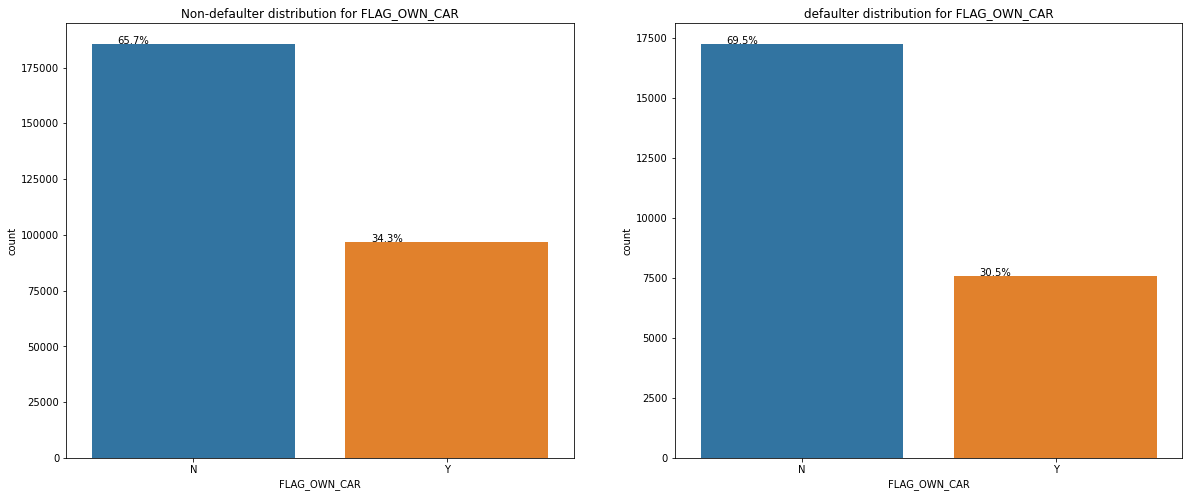

In [303]:
#plotting FLAG_OWN_CAR for target_0 and taregt_1 datasets.
countplot('FLAG_OWN_CAR')

From the above plot we see that the people who are not having car are having more payment difficulties than the people who are owning car.
People not owining the car are haing 65.7% of non-defaulters so it is clear that personnot owining the car are more.

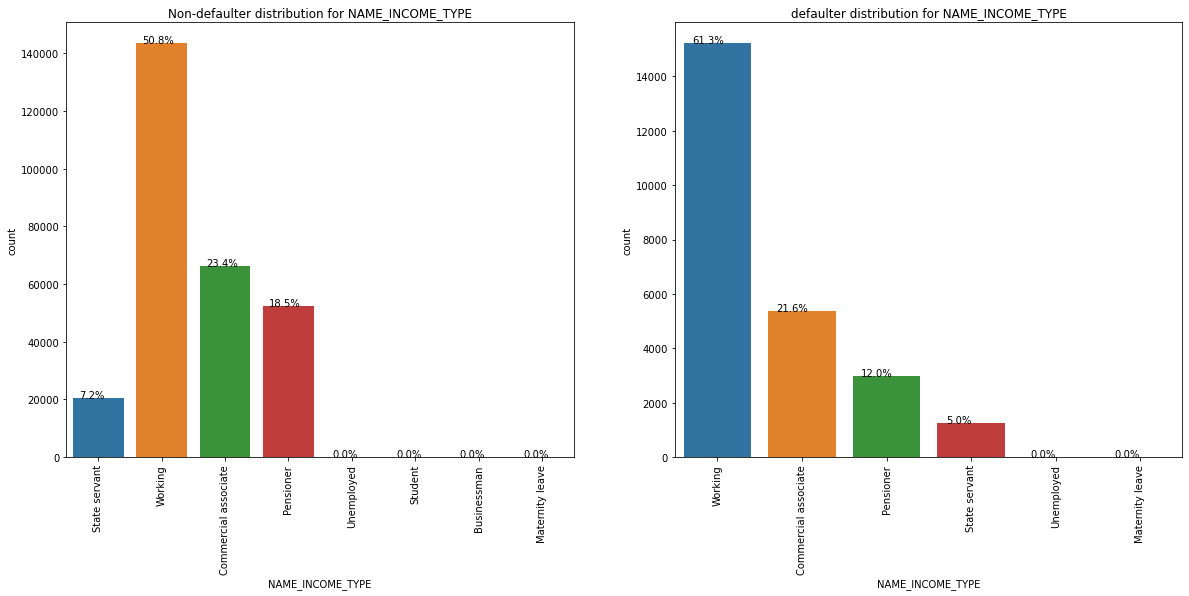

In [325]:
#plotting NAME_INCOME_TYPE for target_0 and taregt_1 datasets.
countplot('NAME_INCOME_TYPE')

From the above plot it is observed that income type as wroking are availing the hi.ghest count of loans as they are having higher percentage in both defaulter and non defaulter list.
we also see that businessmen income type is not there in defaulter list i.e businessmen never defaults

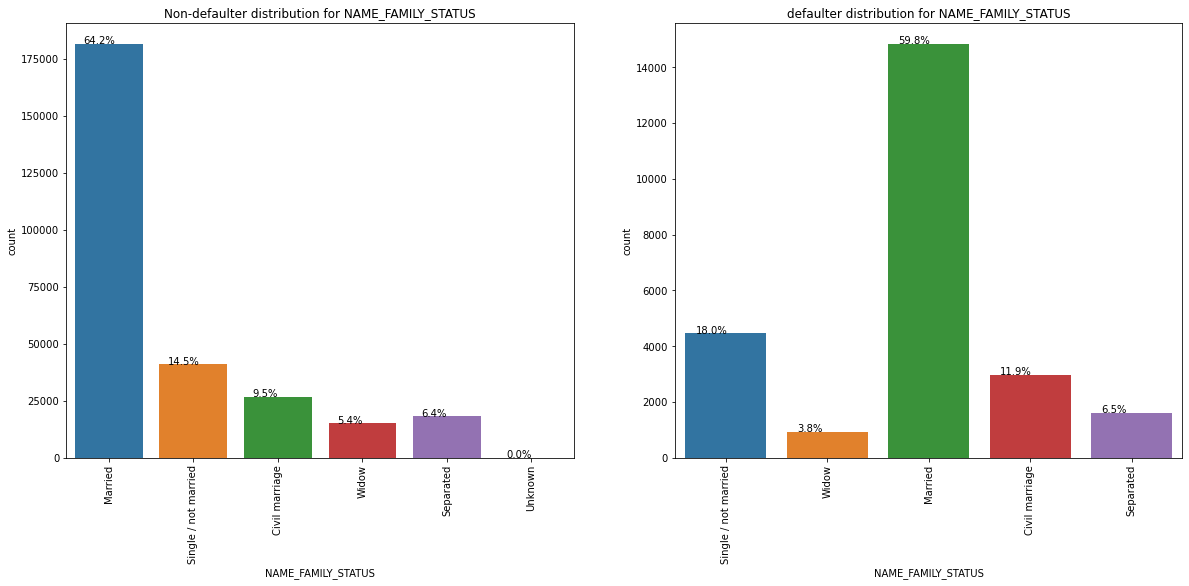

In [326]:
#plotting NAME_FAMILY_STATUS for target_0 and taregt_1 datasets.
countplot('NAME_FAMILY_STATUS')

Married people are taking much loan when compared to other family status as they are having higher no of percentage in both defaulter and non defaulter dataframe.
Seperated have same percent of defaulter and non defaulter

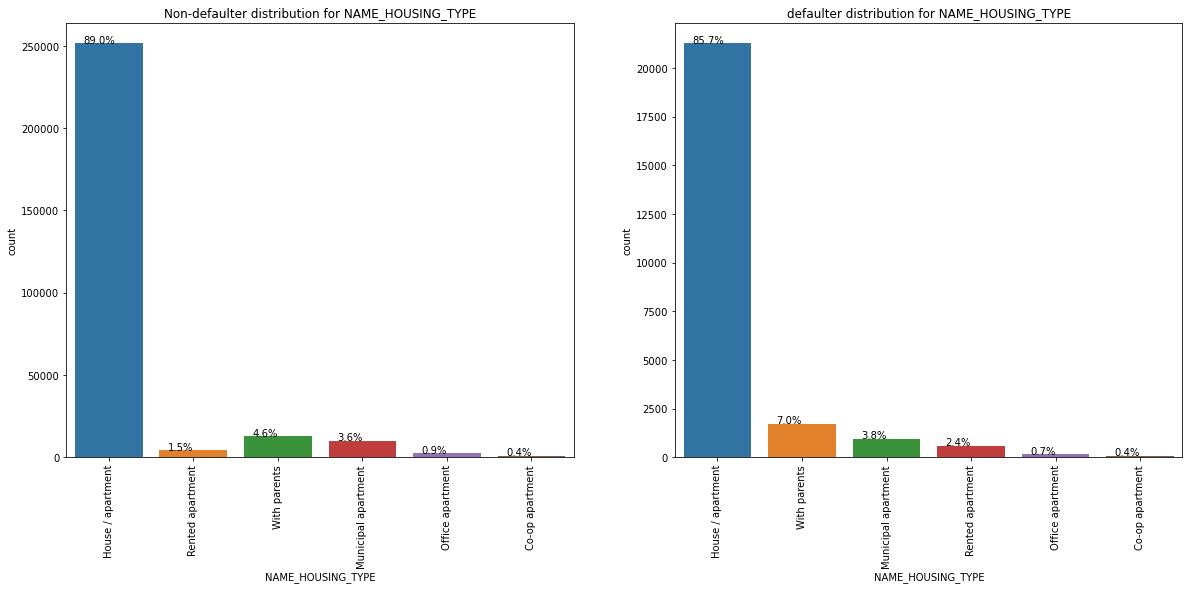

In [327]:
#plotting NAME_HOUSING_TYPE for target_0 and taregt_1 datasets.
countplot('NAME_HOUSING_TYPE')

From the above plot we can see that people having housing type as hous/appartment are applying for more loans.
people living with parents are having difficulties in payment 

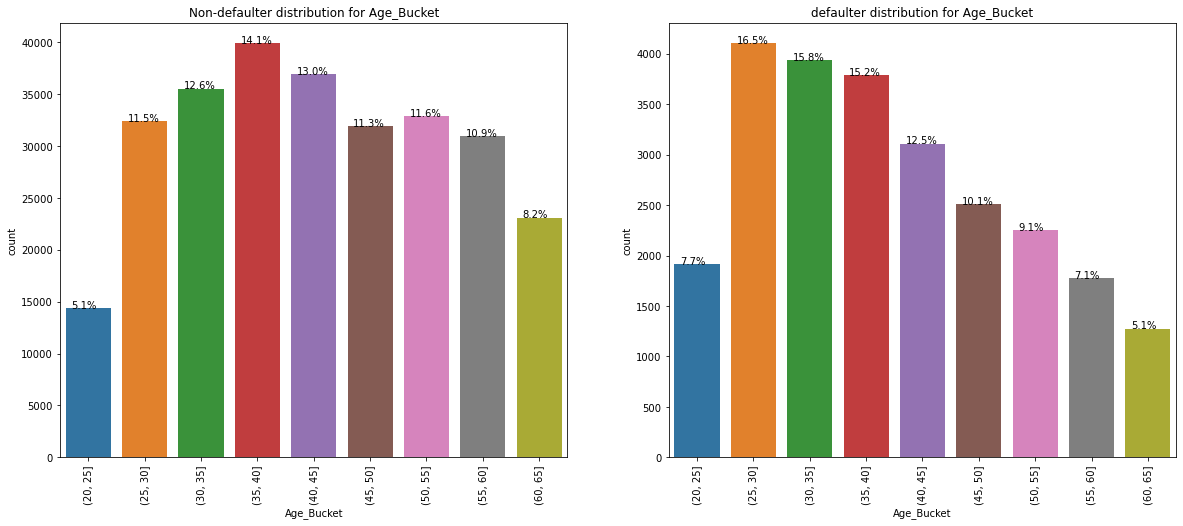

In [331]:
#plotting Age_Bucket for target_0 and taregt_1 datasets.
countplot('Age_Bucket')

We could observe that age-group between 25-30 are having difficulties in payments whne compared to other age group.
We can see that the age-group graph for defaulter is been decreasing starting the age group 25-30.

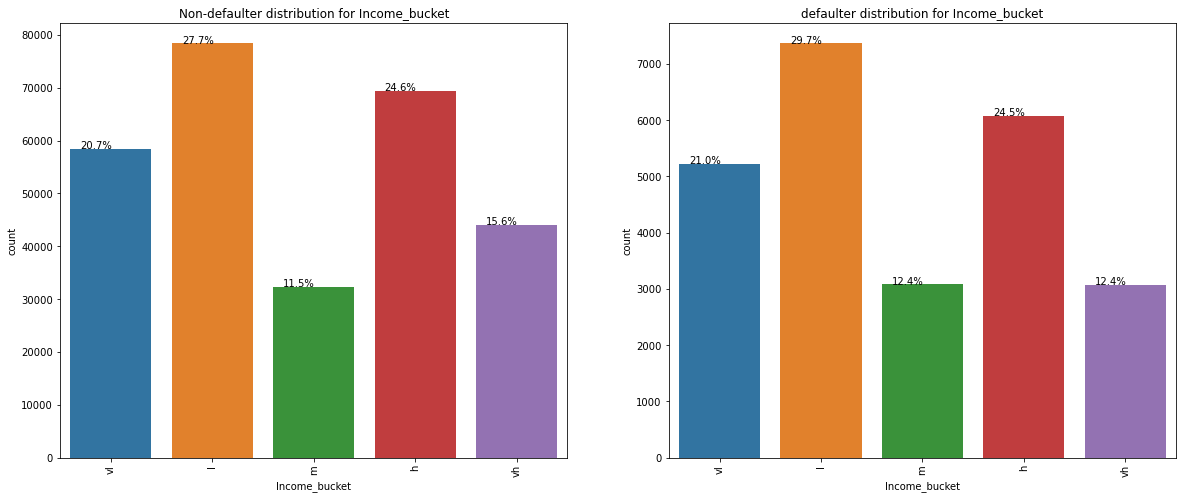

In [333]:
#plotting Income_bucket for target_0 and taregt_1 datasets.
countplot('Income_bucket')

From the above graph we can see that people with low income comprises the most, as their percentage is higher in both defaulter and 
non-defaulter .
very high income people tend to default the least along with medium income range people.

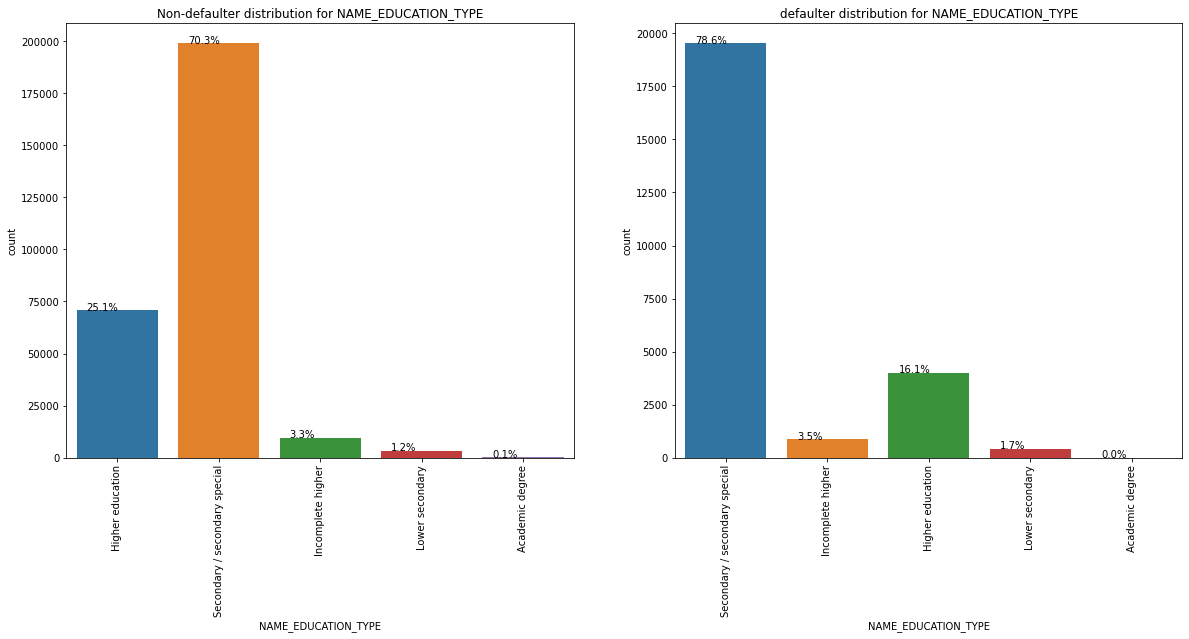

In [335]:
#plotting NAME_EDUCATION_TYPE for target_0 and taregt_1 datasets.
countplot('NAME_EDUCATION_TYPE')

people with secondary education tends to default the most.
The defaulting rate of higher education ones are less when compared to others.

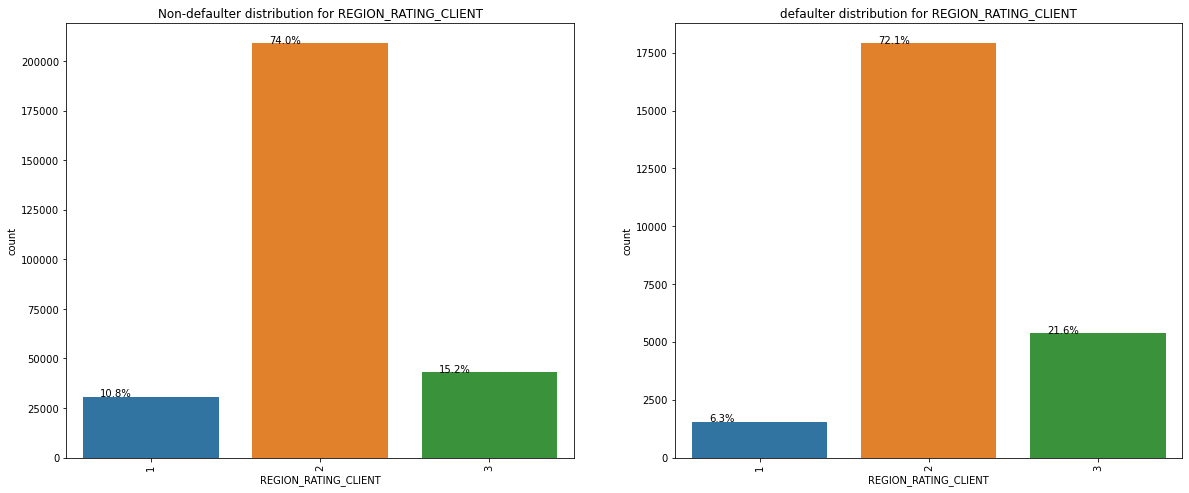

In [337]:
#plotting REGION_RATING_CLIENT for target_0 and taregt_1 datasets.
countplot('REGION_RATING_CLIENT')

People living in region rated as 2 are applying for loans more.
people living in 3 rated regions tends to default more.

In [361]:
#creating function for doing univariate analysis using distribution plot 
def distplot(cols):
    fig,[axs1,axs2]=plt.subplots(1,2,figsize=[20,5])
    sns.distplot(app_target0[cols],bins=15,ax=axs1)
    axs1.set_title(f'Non-default distribution for {cols}')
    sns.distplot(app_target1[cols],bins=15,ax=axs2)
    axs2.set_title(f'Default distribution of {cols}')

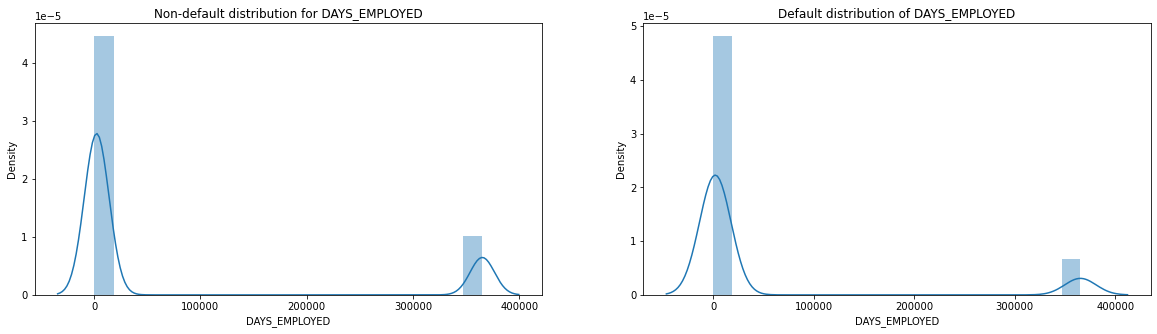

In [356]:
#plotting DAYS_EMPLOYED for target_0 and taregt_1 datasets.
distplot('DAYS_EMPLOYED')

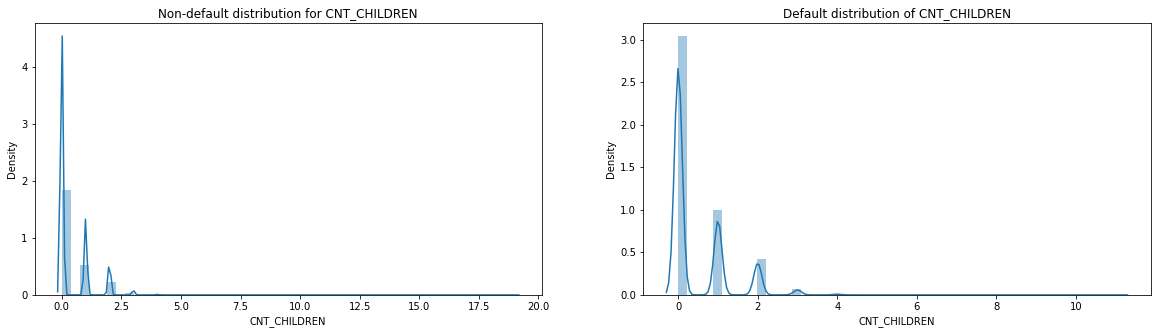

In [359]:
#plotting CNT_CHILDREN for target_0 and taregt_1 datasets.
distplot('CNT_CHILDREN')

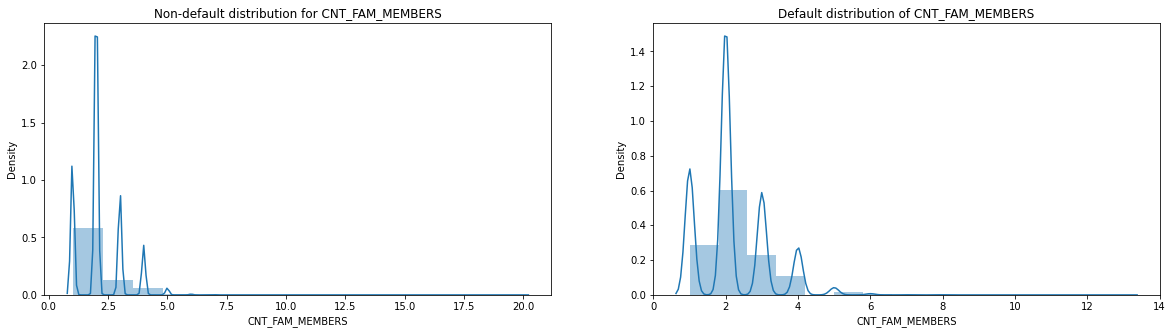

In [362]:
#plotting CNT_FAM_MEMBERS for target_0 and taregt_1 datasets.
distplot('CNT_FAM_MEMBERS')

# Finding the corelation between top 10 col present in the dataset.

In [441]:
#defining the function for creating top 10 corelation in the dataset.
def top10_corr(df,n):
    corr_matrix=df.corr()
    sol=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)).unstack().reset_index()
    sol.columns=['Variable1','Varaible2','Correlation']
    sol.dropna(subset=['Correlation'],inplace=True)
    sol['abs_cor']=sol['Correlation'].abs()
    sol.sort_values(['abs_cor'],ascending=False,inplace=True)
    return sol.head(n)

In [444]:
#top10 coreltion for non-defaulters
top10_corr(app_target0,10)

,Variable1,Varaible2,Correlation,abs_cor
906,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
4700,Age,DAYS_BIRTH,0.999711,0.999711
2728,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508,0.998508
2446,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997018,0.997018
2376,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.993582,0.993582
2448,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.988152,0.988152
418,AMT_GOODS_PRICE,AMT_CREDIT,0.987253,0.987253
2308,FLOORSMAX_MODE,FLOORSMAX_AVG,0.985602,0.985602
2238,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.971032,0.971032
2378,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.962064,0.962064


In [442]:
#top10 coreltion for defaulters
top10_corr(app_target1,10)

,Variable1,Varaible2,Correlation,abs_cor
906,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
4700,Age,DAYS_BIRTH,0.999691,0.999691
2728,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269,0.998269
2446,FLOORSMAX_MEDI,FLOORSMAX_AVG,0.997187,0.997187
2376,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.996124,0.996124
2448,FLOORSMAX_MEDI,FLOORSMAX_MODE,0.989195,0.989195
2308,FLOORSMAX_MODE,FLOORSMAX_AVG,0.986594,0.986594
418,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
2238,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.980466,0.980466
2378,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.978073,0.978073


# Bivariate analysis

In [445]:
#plotting scatterplot for bivariate analysis
def pltscatter(var1,var2):
    fig,[axs1,axs2]=plt.subplots(1,2,figsize=[20,6])
    sns.scatterplot(data=app_target0,x=var1,y=var2,ax=axs1)
    axs1.set_title(f'{var1} vs{var2} for non defaulters')
    sns.scatterplot(data=app_target1,x=var1,y=var2,ax=axs2)
    axs2.set_title(f'{var1} vs{var2} for defaulters')

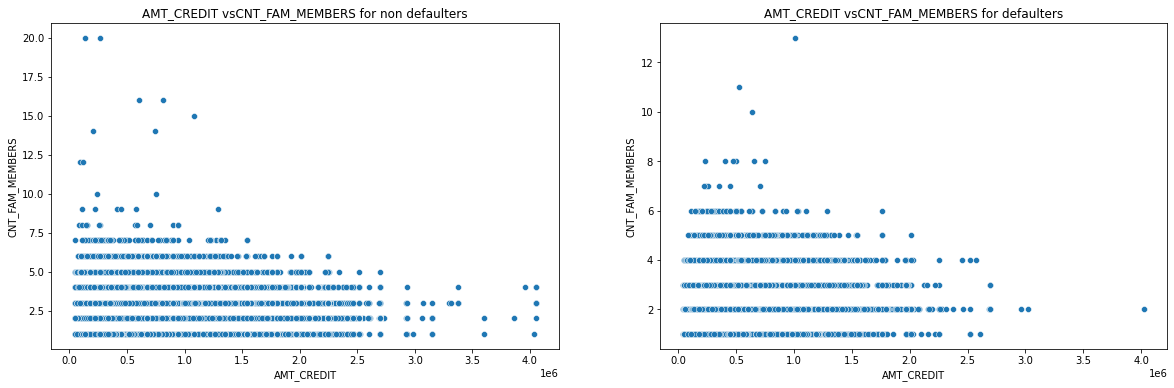

In [446]:
pltscatter('AMT_CREDIT','CNT_FAM_MEMBERS')

We can see that client with less family members and low amount credit are more likely to default.Also there are vey few defaulter with hight count of family members and high amount credit

In [448]:
#function to have boxplot for bivariate analysis
def pltbar(var1,var2):
    fig,[axs1,axs2]=plt.subplots(1,2,figsize=[20,6])
    sns.barplot(data=app_target0,x=var1,y=var2,estimator=np.mean,ax=axs1)
    axs1.set_title(f'{var1} vs{var2} for non defaulters')
    sns.barplot(data=app_target1,x=var1,y=var2,estimator=np.mean,ax=axs2)
    axs2.set_title(f'{var1} vs{var2} for defaulters')

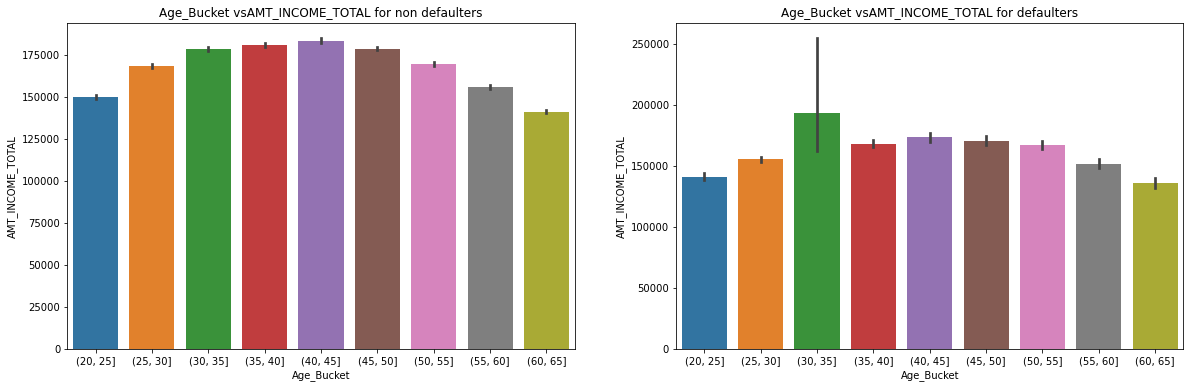

In [449]:
pltbar('Age_Bucket','AMT_INCOME_TOTAL')

From the above graph it is observed that with increase in age the probability of defaulting becomes less and also the income decreases too.

# Analysis for previous application dataset

In [450]:
#calculating the null percentage for the col in previous application dataset
100*prevapp.isnull().sum()/prevapp.shape[0] 

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [453]:
#extracting only those col where null percentage is less than 50 percent
prevapp=prevapp.loc[:,prevapp.isnull().sum()/prevapp.shape[0]<=0.5]

# Univariate analysis of prev app dataset

In [466]:
#creating function for univariate analysis of col w.r.t NAME_CONTRACT_STATUS
def countplot_prevapp(col):
    plt.figure(figsize=[20,6])
    sns.countplot(data=prevapp,x=col,hue='NAME_CONTRACT_STATUS')
    plt.title(f'Countplot for {col}')
    plt.xticks(rotation=90)
    plt.show()

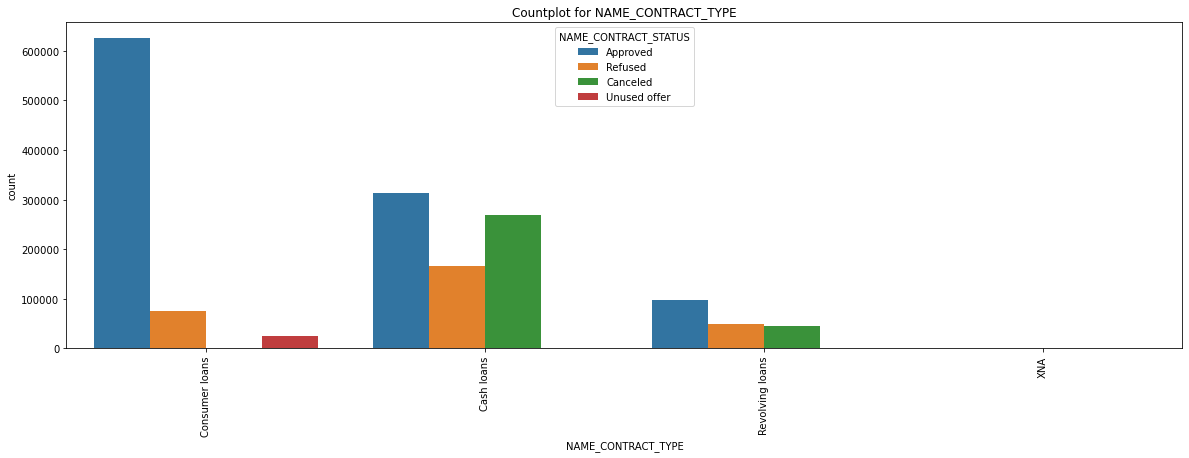

In [467]:
countplot_prevapp('NAME_CONTRACT_TYPE')

From the above plot it can be observed the contract type with Cash loans and Consumer loans are approved the most.
also cash loans are either cancelled or refused the most when compared with other types..

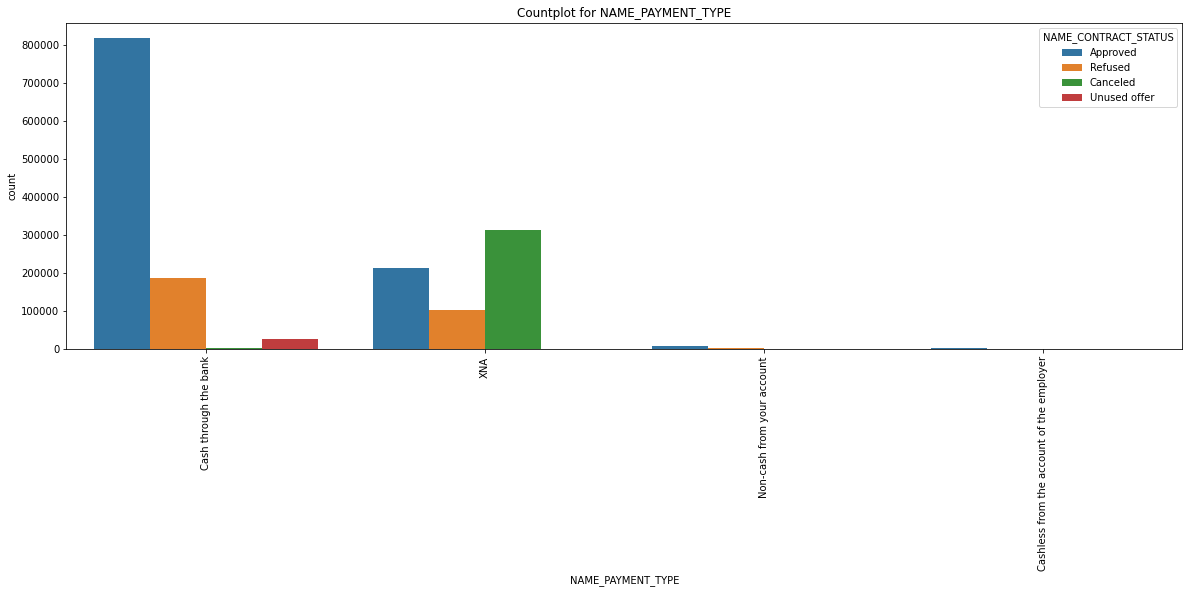

In [469]:
countplot_prevapp('NAME_PAYMENT_TYPE')

Cash through the bank is the most approved payment type mode.
Cashless from the account of the employer is the least approved type of payment mode.

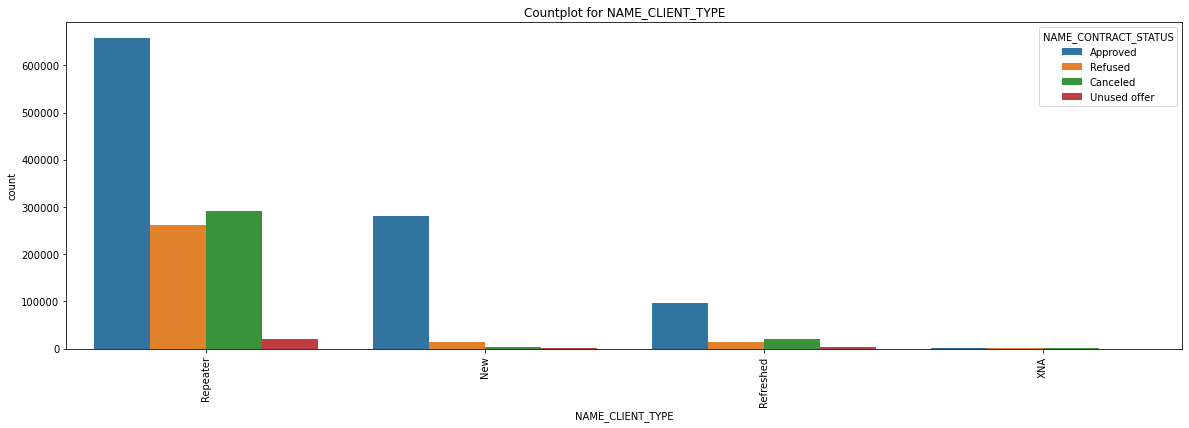

In [473]:
countplot_prevapp('NAME_CLIENT_TYPE')

From the above plot we can observe that new application and repeater application are the most approved ones.
Also repeaters are the ones which are refused most

In [488]:
prevapp.groupby(['NAME_CONTRACT_STATUS'])['AMT_ANNUITY'].mean()

NAME_CONTRACT_STATUS
Approved        14720.350105
Canceled        30289.763892
Refused         20498.160274
Unused offer    10145.798635
Name: AMT_ANNUITY, dtype: float64

# top 10 corelation in prev app dataset 

In [482]:
#finding the corelation between the col in the dataset
corr_matrix=prevapp.corr().abs()
sol = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)).unstack().reset_index()
sol.columns = ['var1','var2','corr']
sol.dropna(how='any',inplace=True)
sol.sort_values(['corr'],ascending=False,inplace=True)
sol.head(10)

,var1,var2,corr
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278


# Bivariate analysis using pairplot

<Figure size 1440x720 with 0 Axes>

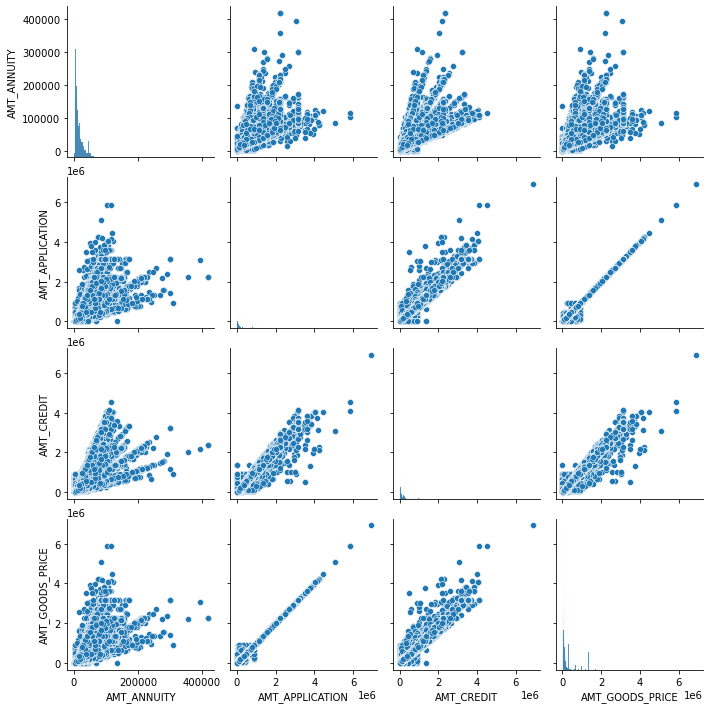

In [484]:
plt.figure(figsize=[20,10])
sns.pairplot(prevapp[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',]])
plt.show()

From the above plot we see that annuty of previous application increases with below facotrs:
a)how much credit did client ask on the previous application
b)Final credit amount on the previous application
c)Goods price of good that client asked for (if applicable) on the previous application

How much credit did client ask on the previous application increases with the increase in good that client asked for (if applicable) on the previous application.

Final credit amount on the previous application that was approved by the bank is positively increasing with how much credit did client ask on the previous application and Goods price of good that client asked for (if applicable) on the previous application.

# Bivariate analysis using boxplot

In [485]:
def plotbox(col1,col2):
    plt.figure(figsize=[10,5])
    plt.title(f'{col1} vs {col2} distribution')
    sns.boxplot(data=prevapp,x=col1,y=col2)
    plt.show()

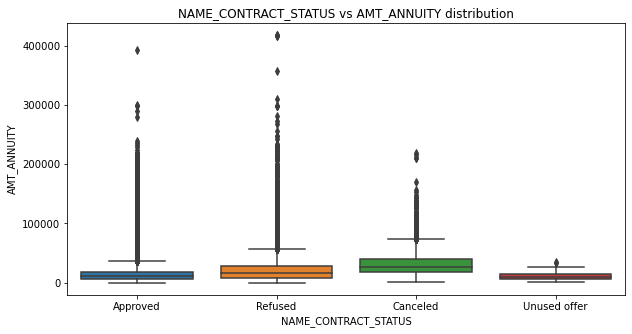

In [486]:
plotbox('NAME_CONTRACT_STATUS','AMT_ANNUITY')

We could see that amt with highest annuity gets refused.
with lower annuity get's cancelled or unused.

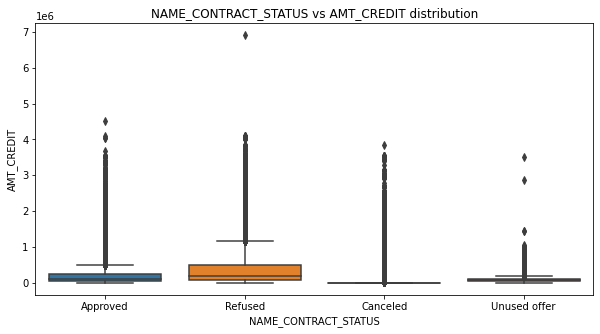

In [489]:
plotbox('NAME_CONTRACT_STATUS','AMT_CREDIT')

From the above plot we see that when the credited amt is too low it gets cancelled or unused.

In [501]:
#selecting few columns from the application_data dataset based on the description provided for further anaylsis and dataset merging
Cols = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','Income_bucket','Age_Bucket','AMT_CREDIT','AMT_INCOME_TOTAL',
'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [503]:
#creating temperory dataframe for the cols selected above
appdata_merge=appdata[Cols]

In [504]:
#merging the data set appdata_merge and prevapp with left join
merge_data=pd.merge(appdata_merge,prevapp,how='left',on='SK_ID_CURR')

In [505]:
#inspecting the dataset
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430100 entries, 0 to 1430099
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1430100 non-null  int64   
 1   TARGET                       1430100 non-null  int64   
 2   CODE_GENDER                  1430100 non-null  object  
 3   FLAG_OWN_CAR                 1430100 non-null  object  
 4   FLAG_OWN_REALTY              1430100 non-null  object  
 5   Income_bucket                1430100 non-null  category
 6   Age_Bucket                   1402709 non-null  category
 7   AMT_CREDIT_x                 1430100 non-null  float64 
 8   AMT_INCOME_TOTAL             1430100 non-null  float64 
 9   NAME_INCOME_TYPE             1430100 non-null  object  
 10  NAME_EDUCATION_TYPE          1430100 non-null  object  
 11  NAME_FAMILY_STATUS           1430100 non-null  object  
 12  NAME_HOUSING_TYPE           

# Analysis using stacked bar chart

In [526]:
def stackplot(col1,col2):
    res=pd.pivot_table(data=merge_data,index=col1,columns=col2,values='SK_ID_CURR',aggfunc='count')
    res=res.apply(lambda x: x/x.sum(),axis=1)
    res.plot(kind='bar',stacked='True',figsize=[15,6])
    plt.title(f'propotion of {col2} for {col1}')
    plt.show()

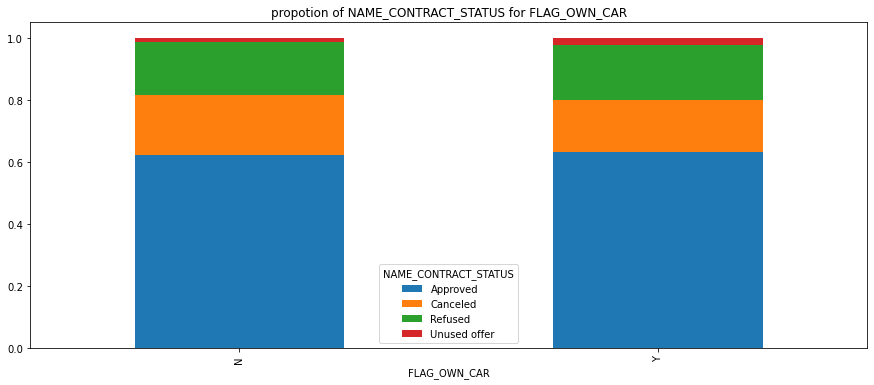

In [527]:
stackplot('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

From the above plot we cannot see any difference between the people ownning and not owning the car impacting the contract status.The proportion of apprved,cancelled,refused and unused offer is same almost.

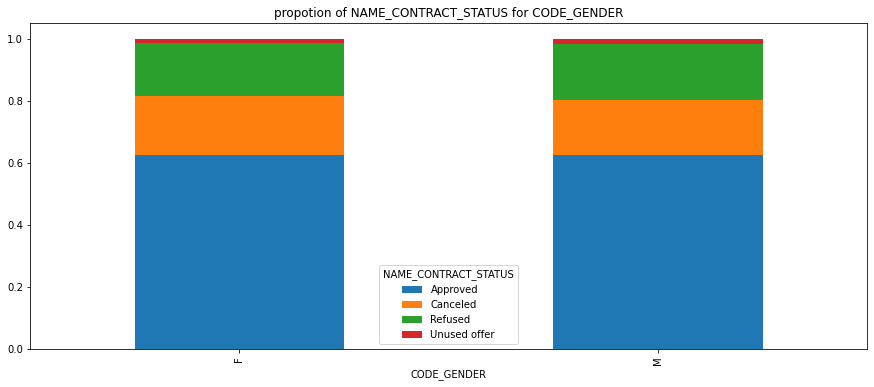

In [528]:
stackplot('CODE_GENDER','NAME_CONTRACT_STATUS')

From the above plot we see that approved and refused contract status is same for both the gender 

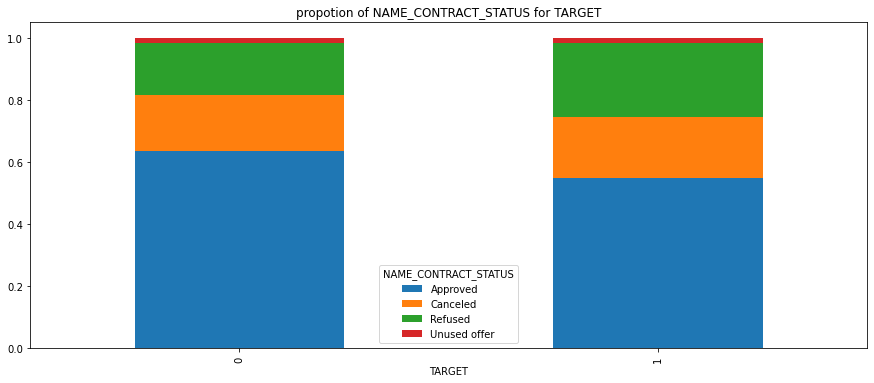

In [529]:
stackplot('TARGET','NAME_CONTRACT_STATUS')

People with payment difficulties is seen to have less proportion of approved loans when compared with people having no difficulties and also these people have higher chances of their loan being refused

In [530]:
res.apply(lambda x: x/x.sum(),axis=1)

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_CAR,,,,
N,0.624122,0.191583,0.171035,0.013260
Y,0.632073,0.167667,0.178552,0.021708


In [533]:
res.apply(lambda x: x/x.sum())

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
FLAG_OWN_CAR,,,,
N,0.660095,0.692049,0.653251,0.545738
Y,0.339905,0.307951,0.346749,0.454262


In [4]:
x=[i for i in range(2,20) if i%2==0]
x

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [13]:
x=int(input())
y= 0
while(x>0):
    k=x%10
    l=k+y*10
    x=x//10
    y=l
print(l)

326
623


In [20]:
n=int(input())
x=0
y=1
print(x)
print(y)
for i in range(2,n):
    z=x+y
    print(z)
    x=y
    y=z
    
    

6
0
1
1
2
3
5


In [2]:
l =[2,4,6,8,10]
sum(l)

30

In [6]:
s='data science'
l=s.split()
l=[s.title() for s in l]
'_'.join(l)

'Data_Science'

In [7]:
l.reverse()
l

['Science', 'Data']

In [24]:
a='programming'
b=[]
c=[]
for i in range(len(a)):
    if a[i] in 'aeiou':
        b.append(a[i])
    else:
         c.append(a[i])
b.extend(c)
''.join(b)

'oaiprgrmmng'

In [25]:
l=[8, 9, 2, 2, 3, 4, 5, 2]
l=list(set(l))
l

[2, 3, 4, 5, 8, 9]

In [27]:
l=[8, 9, 2, 2, 3, 4, 5, 2]
d={}
for i in l:
    if i not in d:
        d[i]=1
print(d.keys())

dict_keys([8, 9, 2, 3, 4, 5])


In [29]:
l=[8, 9, 2, 2, 3, 4, 5, 2]
s=0
for i in l:
    s=s+i
s

35

In [ ]:
l=[8, 9, 2, 2, 3, 4, 5, 2]
l2=